# Importance Sampling Introduction
---

본 글은 [Jeremy Zhang님의 글](https://towardsdatascience.com/importance-sampling-introduction-e76b2c32e744)을 읽고 이해한대로 쓴 글이다.

Importance Sampling(IS)은 샘플링 메서드 대신 메서드를 근사화하는 것이다. 목차는 다음과 같다.

1. IS의 아이디어에 대해 배운다.
2. 실행 과정을 통해 깊게 이해해본다.
3. 다른 샘플링 분포들로부터 결과를 비교해본다.


## What is importance sampling?

함수 f(x)의 expectation을 계산한다고 생각해보자. 이때, x는 분포 p(x)에서 랜덤하게 추출된다. 그럼 E(f(x))를 다음과 같이 쓸 수 있다.

$$
E[f(x)] = \int f(x)p(x) dx \approx \frac{1}{n}\sum_i f(x_i)
$$

몬테카를로 샘플링 방법은 분포 p(x)로부터 간단히 x를 샘플링 할 수 있고, expectation을 추정하기 위해 모든 샘플들의 평균을 취한다. 이때, 추출할 때 랜덤하지만 같은 확률로 랜덤하게이므로 평균을 취할 수 있는 것이다.

근데 만약 p(x)가 샘플링하기 어려운 경우에는 어떻게 해야할까? 우리는 쉽게 샘플링된 분포와 알려진 것들을 기반으로 expectation을 추정할 수 있을까? {영어가 좀 이상하다}

정답은 YES 이다. 이것은 간단한 공식 변형을 통해 얻는다

$$
E[f(x)] = \int f(x)p(x) dx = \int f(x)\frac{p(x)}{q(x)}q(x)dx \approx \frac{1}{n}\sum_i f(x_i)\frac{p(x_i)}{q(x_i)}
$$

여기서 x는 분포 p(x)가 아닌, q(x)로부터 샘플링된다. 그리고 q(x)는 0이 되면 안된다. 이 방식으로, expectation을 추정하는 것은 다른 분포 q(x)로부터 샘플링할 수 있다. p(x)/q(x)는 sampling ratio 또는 sampling weight라고 불린다. 이 가중치는 다른 분포에서 확률 표본을 상쇄하는 보정 가중치 역할을 한다.

우리는 variance도 고려해봐야한다. 식은 다음과 같다.

$$
Var(X) = E[X^2]-E[X]^2
$$

여기서, X는 f(x)p(x)/q(x)이다. 만약 p(x)/q(x)가 크다면, large variance를 얻게될 것이고, 이것은 우리가 절대적으로 피해야할 상황이다. 이것은 적절하게 q(x)를 선택함으로써 small variance를 가질 수 있다. 예시를 봐보자.

먼저 함수 f(x)를 다음과 같이 사용한다.

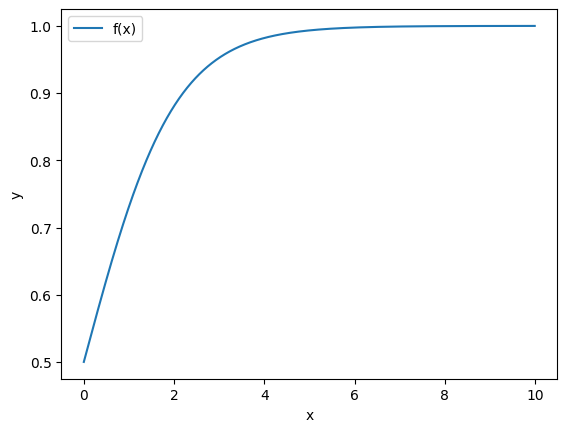

In [16]:
import matplotlib.pyplot as plt
import numpy as np

def f_x(x):
    return 1/(1+np.exp(-x))

x = np.arange(0,10,0.01)
y = f_x(x)

plt.plot(x,y,label='f(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

이제 p(x)와 q(x)의 분포를 만들어보자.

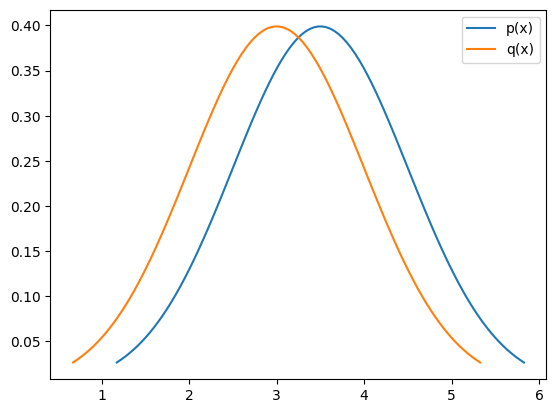

In [67]:
from scipy import stats

def distribution(mu=0, sigma=1):
    # return probability given a value
    distribution = stats.norm(mu, sigma)
    return distribution
    
mu_target = 3.5
sigma_target = 1
mu_appro = 3
sigma_appro = 1

p_x = distribution(mu_target, sigma_target)
q_x = distribution(mu_appro, sigma_appro)

fig, ax = plt.subplots(1, 1)
p_x_range = np.linspace(p_x.ppf(0.01),
                p_x.ppf(0.99), 100)
q_x_range = np.linspace(q_x.ppf(0.01),
                q_x.ppf(0.99), 100)

ax.plot(p_x_range, p_x.pdf(p_x_range),label='p(x)')
ax.plot(q_x_range, q_x.pdf(q_x_range),label='q(x)')
plt.legend()


이제 분포 p(x)로부터 추출된 x로 f(x)의 평균을 계산할 수 있다.

분포 p(x)로부터의 f(x)의 평균 0.9564570993074145
분포 q(x)로부터의 f(x)의 평균 0.9316180514081762
분포 q(x)의 표본에 weight를 추가한 f(x)의 평균 0.9668409569230648


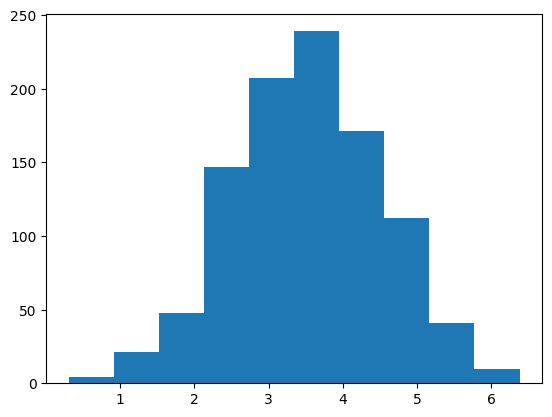

In [69]:

# pre-setting
n = 1000
p = 0
q = 0
weighted_q = 0
list_ = []
# 분포 p(x)로부터의 f(x)의 평균구하기
for i in range(n):
    # draw a sample
    x_i = np.random.normal(mu_target, sigma_target) # 샘플을 랜덤하게 추출
    list_.append(x_i)
    p += f_x(x_i)
print("분포 p(x)로부터의 f(x)의 평균", p/n)

plt.hist(list_)

# 분포 q(x)로부터의 f(x)의 평균구하기
for i in range(n):
    x_i = np.random.normal(mu_appro, sigma_appro) #샘플 추출
    q += f_x(x_i)
    weighted_q += f_x(x_i)*p_x.pdf(x_i)/q_x.pdf(x_i)
print("분포 q(x)로부터의 f(x)의 평균", q/n)
print("분포 q(x)의 표본에 weight를 추가한 f(x)의 평균", weighted_q/n)



좀 이상하다 설명이랑 예제가 일단 킵하자.